# régression linéaire multiple

## Introduction  

La régression linéaire multiple est une méthode statistique qui permet d'étudier et de modéliser la relation entre une variable dépendante (ou cible) et plusieurs variables explicatives (ou prédictrices). Elle est particulièrement utile pour comprendre comment différents facteurs contribuent simultanément à un phénomène observé.  

Dans le contexte de la transition énergétique, une question clé est de savoir quels sont les facteurs économiques et sociaux qui influencent le pourcentage d'énergie renouvelable dans le mix énergétique des pays. Cette problématique est cruciale pour aider les décideurs à concevoir des politiques efficaces pour encourager l’adoption des énergies renouvelables.  

#### Problématique  
Quels sont les déterminants économiques et sociaux qui influencent la proportion d'énergies renouvelables dans le mix énergétique des pays, et dans quelle mesure ces facteurs interagissent-ils pour façonner la transition énergétique ?  

#### Variables utilisées  
1. **Variable cible (dépendante)** :  
   - Pourcentage d'énergie renouvelable dans le mix énergétique (**EG.FEC.RNEW.ZS**).  

2. **Variables explicatives (indépendantes)** :  
   - **PIB par habitant** (**NY.GDP.PCAP.CD**) : indicateur économique reflétant le niveau de développement économique d’un pays.  
   - **Investissements dans les énergies renouvelables** (**EG.ELC.RNWX.ZS**) : pourcentage du PIB investi dans les énergies renouvelables, reflétant les priorités politiques et économiques du pays.  
   - **Accès à l'électricité (% de la population)** (**EG.ELC.ACCS.ZS**) : Reflète le niveau d'infrastructure énergétique.  

#### Objectifs de l'étude  
1. **Analyser l'impact des variables explicatives** sur la proportion d'énergie renouvelable dans le mix énergétique.  
2. **Quantifier l'effet de chaque facteur** pour déterminer les leviers les plus efficaces dans la transition énergétique.  
3. **Proposer des recommandations politiques** pour renforcer l'adoption des énergies renouvelables en s'appuyant sur des données quantitatives.  

## Étape 1 : Importation des bibliothèques nécessaires

In [35]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as mb

## Étape 2 : Chargement et exploration des données

In [2]:
data = pd.read_csv('transition_energetique_pays_2023.csv')

In [3]:
# Affichage des premières lignes
print(data.head())

                          Pays  Taux d'énergie renouvelable  Année  \
0                  Afghanistan                    17.846154   2023   
1  Africa Eastern and Southern                    62.614134   2023   
2   Africa Western and Central                    77.223132   2023   
3                      Albania                    39.283333   2023   
4                      Algeria                     0.150000   2023   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              415.707417                             47.154018   
1             1659.515290                             69.520690   
2             1568.7243

In [4]:
# Vérification des colonnes et des types de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Pays                                                  266 non-null    object 
 1   Taux d'énergie renouvelable                           266 non-null    float64
 2   Année                                                 266 non-null    int64  
 3   Investissements en énergies renouvelables (% du PIB)  266 non-null    float64
 4   PIB par habitant (USD)                                266 non-null    float64
 5   Taux de scolarisation secondaire (%)                  266 non-null    float64
 6   Accès à l'électricité (%)                             266 non-null    float64
 7   Revenu                                                266 non-null    object 
 8   Dépassement 50%                                       266 no

## Étape 3 : Préparation des données

#### 1-Sélectionner les colonnes nécessaires.

In [5]:
data_regression = data[['Taux d\'énergie renouvelable', 'PIB par habitant (USD)', 
                                'Investissements en énergies renouvelables (% du PIB)', 
                                'Accès à l\'électricité (%)']]

#### 2-Vérifier la distribution des données.

In [6]:
# Vérification des statistiques descriptives
print(data_regression.describe())

       Taux d'énergie renouvelable  PIB par habitant (USD)  \
count                   266.000000              266.000000   
mean                     29.667803            19801.484066   
std                      27.240385            29241.462131   
min                       0.000000              193.007146   
25%                       7.401923             2478.681863   
50%                      21.750203             8142.831461   
75%                      46.682692            23249.998705   
max                      95.833333           256580.515123   

       Investissements en énergies renouvelables (% du PIB)  \
count                                         266.000000      
mean                                            4.838663      
std                                             6.285018      
min                                             0.000000      
25%                                             0.569904      
50%                                             4.838663      


1. **Taux d'énergie renouvelable** :
   - Moyenne : ~29.67%, avec une forte variabilité (écart-type ~27.24%).
   - Large amplitude : de 0% (aucune énergie renouvelable) à 95.83% (quasi-totalité).
   - **Conclusion** : Les pays présentent des niveaux très hétérogènes de transition énergétique.

2. **PIB par habitant (USD)** :
   - Moyenne : ~19,801 USD, mais une grande disparité (écart-type ~29,241 USD).
   - Écarts extrêmes : ~193 USD (pays pauvres) à ~256,580 USD (pays riches).
   - **Conclusion** : Le développement économique varie fortement entre les pays.

3. **Investissements en énergies renouvelables (% du PIB)** :
   - Moyenne : ~ 4.84%, avec un écart-type élevé (~6.29%).
   - Concentration autour de la médiane (~ 4.84%) et certains pays atteignent des pics (~47.94%).
   - **Conclusion** : Les investissements restent modestes pour beaucoup de pays, mais certains se démarquent.

4. **Accès à l'électricité (%)** :
   - Moyenne : ~83.58%, mais des écarts importants (écart-type ~25.29%).
   - Large gamme : 5.12% (infrastructures faibles) à 100% (infrastructures complètes).
   - **Conclusion** : Bien que l’accès à l’électricité soit globalement élevé, certains pays ont encore un déficit important.

## Étape 4 : Analyse exploratoire

#### 1-visualiser les relations entre les variables explicatives et la variable cible

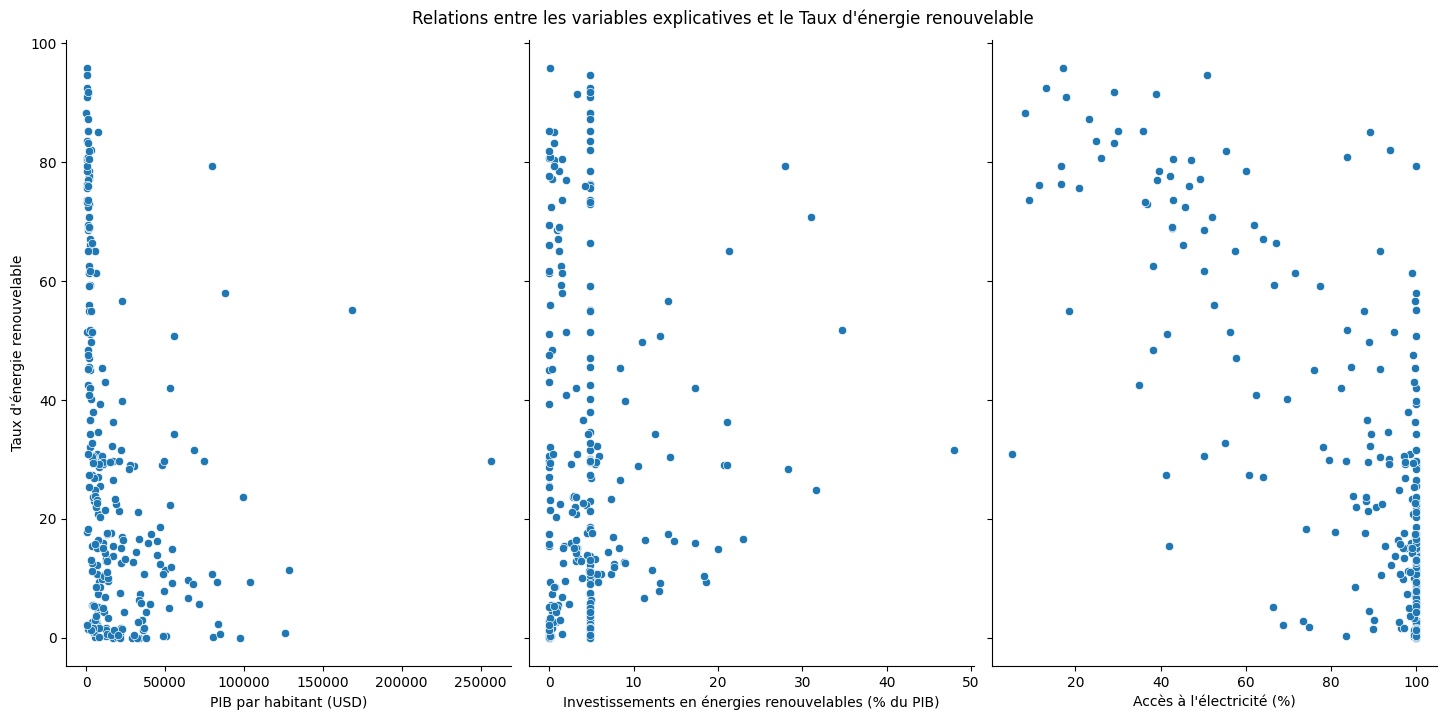

In [8]:
# Créer un pairplot pour visualiser les relations entre les variables explicatives et la variable cible
sns.pairplot(
    data_regression,
    x_vars=[
        "PIB par habitant (USD)", 
        "Investissements en énergies renouvelables (% du PIB)", 
        "Accès à l'électricité (%)"
    ],
    y_vars="Taux d'énergie renouvelable",
    height=7,
    aspect=0.7
)

plt.suptitle("Relations entre les variables explicatives et le Taux d'énergie renouvelable", y=1.02)
plt.show()

voici une interprétation des relations entre les variables explicatives et **la variable cible (Taux d'énergie renouvelable)** :

##### 1. **PIB par habitant (USD)** :
- La majorité des pays ayant un taux élevé d'énergie renouvelable ont un PIB par habitant relativement faible (en dessous de 50 000 USD). 
- Une tendance inverse peut être perçue : plus le PIB par habitant augmente, plus le taux d'énergie renouvelable tend à diminuer. Cependant, cette relation semble très dispersée.

##### 2. **Investissements en énergies renouvelables (% du PIB)** :
- Il semble y avoir une corrélation légèrement positive : certains pays avec des investissements plus élevés en pourcentage du PIB tendent à avoir des taux d'énergie renouvelable élevés.
- Cependant, la plupart des données sont concentrées autour de faibles pourcentages d'investissements, et la relation reste peu marquée.

##### 3. **Accès à l'électricité (%)** :
- Une majorité de points se situent dans la région où l'accès à l'électricité est proche de 100 %. Cela montre que de nombreux pays dans l'ensemble de données ont une bonne couverture électrique.
- Une relation inverse semble exister : les pays avec un taux d'accès élevé à l'électricité tendent à avoir un taux d'énergie renouvelable plus faible.

#### 2-Matrice de corrélation

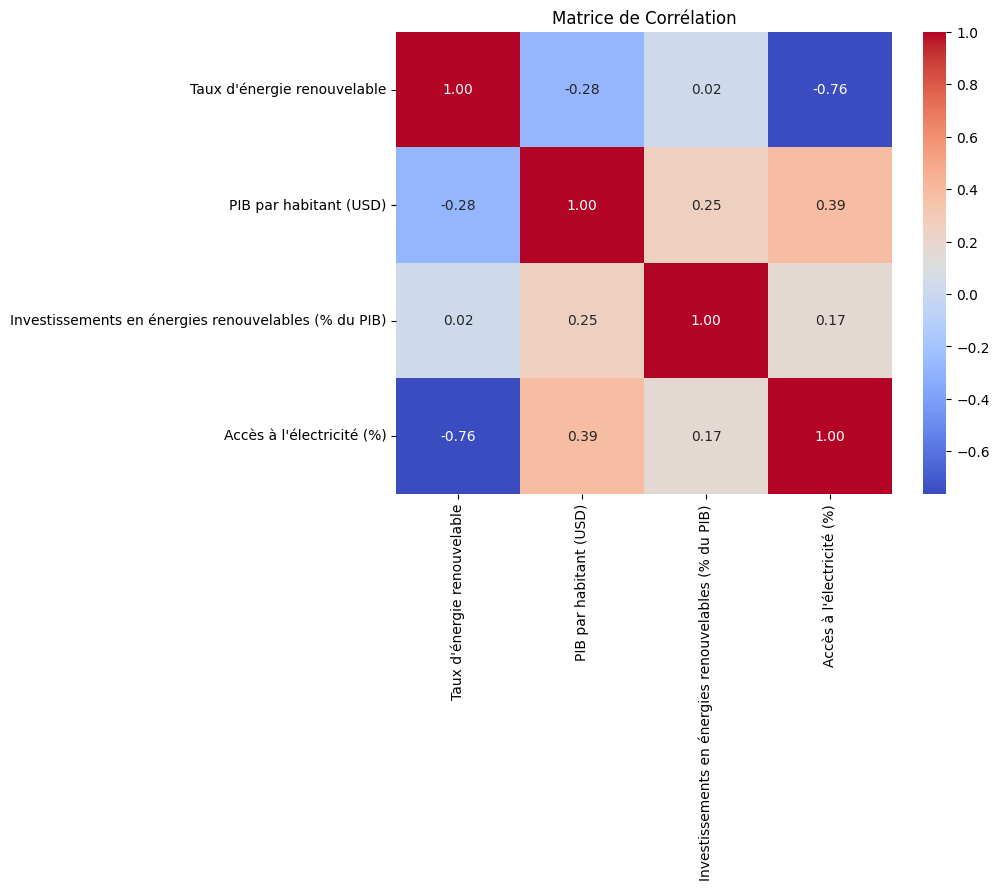

In [9]:
# Calcul de la matrice de corrélation
correlation_matrix = data_regression.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation")
plt.show()

##### Relations importantes
1. **Taux d'énergie renouvelable et Accès à l'électricité (%):**
   - Corrélation : **-0.76**
   - Interprétation : Forte corrélation négative. Cela signifie qu'à mesure que l'accès à l'électricité augmente, le taux d'énergie renouvelable tend à diminuer dans les données.

2. **Taux d'énergie renouvelable et PIB par habitant (USD):**
   - Corrélation : **-0.28**
   - Interprétation : Faible corrélation négative. Une augmentation du PIB par habitant est légèrement associée à une diminution du taux d'énergie renouvelable.

3. **Taux d'énergie renouvelable et Investissements en énergies renouvelables (% du PIB):**
   - Corrélation : **0.02**
   - Interprétation : La corrélation extrêmement faible (0.02). Les investissements en énergies renouvelables, en pourcentage du PIB, n'ont pas d'impact direct apparent sur le taux d'énergie renouvelable.


- **Taux d'énergie renouvelable** semble être fortement influencé par l'accès à l'électricité, mais moins par le PIB et les investissements en énergies renouvelables.

#### 3-Nuage de points

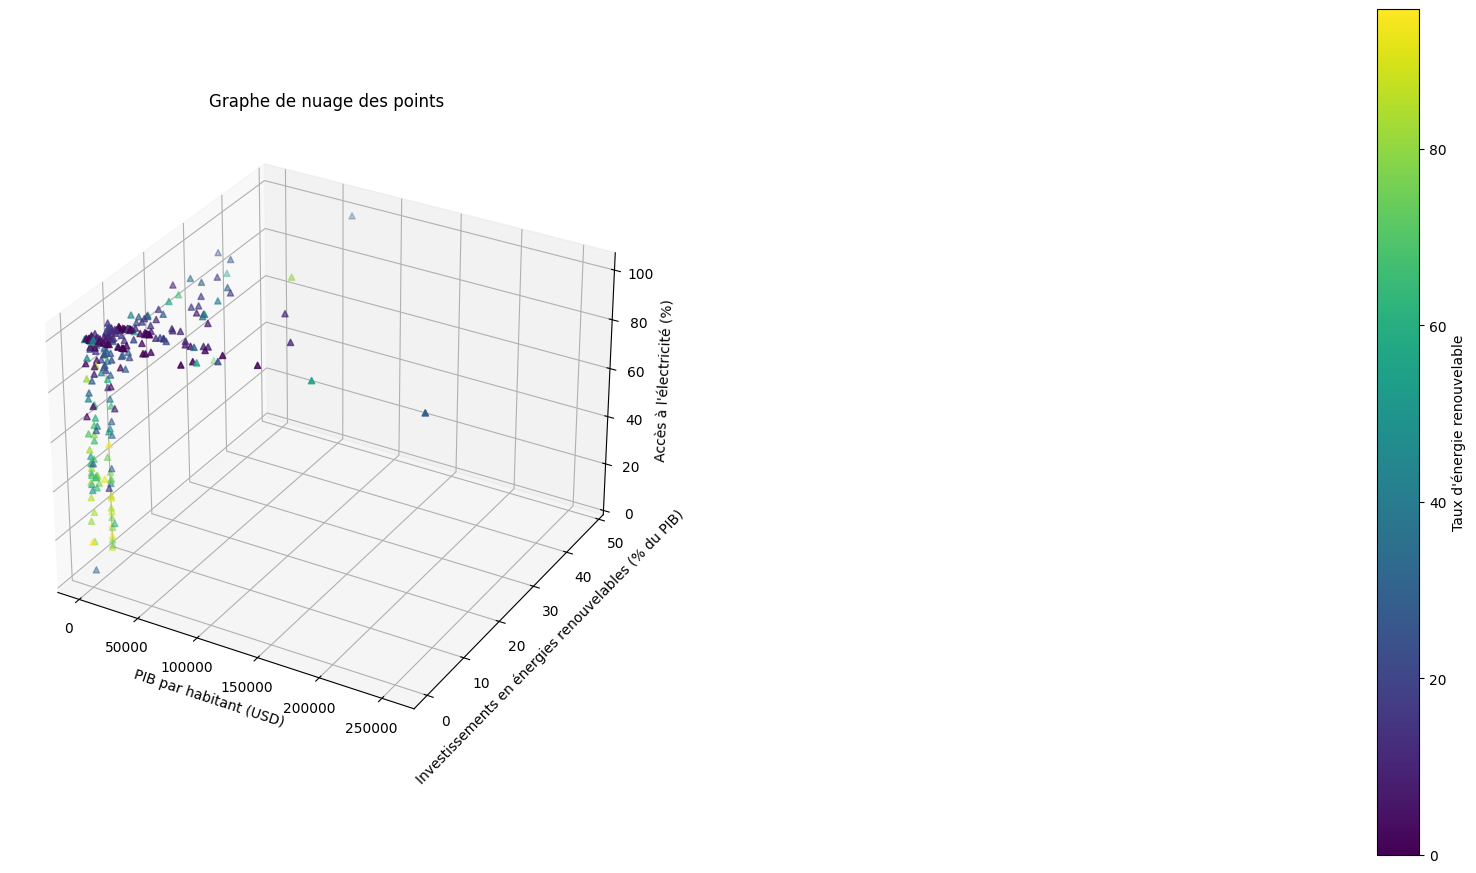

In [27]:
# 'x_vars' contient les 3 variables explicatives
# 'y_vars' contient la variable de réponse

# Créer un graphique de taille 16x10
grp = plt.figure(figsize=(40, 34))

# Ajouter un subplot 3D
ax = grp.add_subplot(121, projection='3d')

# Les variables explicatives
x = data_regression["PIB par habitant (USD)"]
y = data_regression["Investissements en énergies renouvelables (% du PIB)"]
z = data_regression["Accès à l'électricité (%)"]

# La variable de réponse (utilisée pour la couleur des points)
response = data_regression["Taux d'énergie renouvelable"]

# Créer le nuage de points en 3D
sc = ax.scatter(x, y, z, c=response, cmap='viridis', marker='^')

# Ajouter les labels aux axes
ax.set_xlabel('PIB par habitant (USD)')
ax.set_ylabel('Investissements en énergies renouvelables (% du PIB)')
ax.set_zlabel('Accès à l\'électricité (%)')

# Titre du graphique
plt.title('Graphe de nuage des points')

# Ajouter une barre de couleur pour indiquer les valeurs de la variable réponse
plt.colorbar(sc, label='Taux d\'énergie renouvelable', fraction=0.03, pad=0.52)

# Afficher le graphique
plt.show()

1. **Tendances générales** :
   - L’**accès à l’électricité** (axe Z) semble jouer un rôle majeur dans la variation du **taux d’énergie renouvelable**. Cela est cohérent avec la **corrélation négative forte (-0.76)** observée dans la matrice : les pays ayant un accès élevé à l’électricité tendent à utiliser des sources d’énergie moins renouvelables (probablement en raison d'une dépendance aux combustibles fossiles dans des systèmes électriques bien établis).

2. **Impact du PIB par habitant** :
   - Bien que le **PIB par habitant** varie fortement (axe X), sa relation avec le taux d’énergie renouvelable est **faiblement négative**. Les pays riches, bien qu’ayant des ressources pour développer les énergies renouvelables, semblent aussi être plus industrialisés et utiliser davantage de sources non renouvelables.

3. **Investissements en énergies renouvelables** :
   - Les **investissements (% du PIB)** (axe Y) montrent une dispersion importante, et la **corrélation faible** indique que leur impact direct sur le taux d’énergie renouvelable est limité dans ces données. Cela pourrait refléter que les investissements ne se traduisent pas toujours par des résultats immédiats dans le mix énergétique.


- **Accès à l'électricité** est le principal déterminant, souvent associé à une diminution du taux d'énergie renouvelable.
  
- Ce graphique illustre bien les disparités entre pays et la nécessité de prendre en compte plusieurs facteurs pour comprendre les moteurs de la transition énergétique.

## Étape 5 : Modélisation de la régression linéaire multiple

#### 1-Préparation des variables

In [32]:
#La variable cible est Taux d'énergie renouvelable, et les explicatives sont PIB par habitant (USD), Investissements en énergies renouvelables (% du PIB), et Accès à l'électricité (%).
# Définir X (variables explicatives) et y (variable cible)
X = data_regression[['PIB par habitant (USD)', 
                     'Investissements en énergies renouvelables (% du PIB)', 
                     'Accès à l\'électricité (%)']]
y = data_regression['Taux d\'énergie renouvelable']

#### 2-Ajustement du modèle

In [33]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données explicatives
scaler = StandardScaler()

# Ajustement du scaler sur l'ensemble d'entraînement et transformation
X_train_scaled = scaler.fit_transform(X_train)

# Transformation de l'ensemble de test
X_test_scaled = scaler.transform(X_test)

# Ajout de la constante pour le modèle (intercept)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Création et ajustement du modèle sur les données d'entraînement
model = sm.OLS(y_train, X_train_scaled).fit()

# Résumé des résultats
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Taux d'énergie renouvelable   R-squared:                       0.595
Model:                                     OLS   Adj. R-squared:                  0.589
Method:                          Least Squares   F-statistic:                     101.9
Date:                         Sun, 22 Dec 2024   Prob (F-statistic):           1.27e-40
Time:                                 06:24:09   Log-Likelihood:                -904.29
No. Observations:                          212   AIC:                             1817.
Df Residuals:                              208   BIC:                             1830.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

1. **R-squared** : 0.595
     - Cela signifie que **59,5 % de la variance** du taux d'énergie renouvelable est expliquée par les variables explicatives (PIB par habitant, investissements en énergies renouvelables, et accès à l'électricité).


2. **Coefficients des variables explicatives** :
   - **Constante (const)** : 30.8770
     - En l'absence de variation des autres variables, le taux d'énergie renouvelable moyen est de **30,88 %**.
   - **x1 (PIB par habitant)** : -0.4482 (non significatif)
     - La relation entre le PIB par habitant et le taux d'énergie renouvelable est **faible et non statistiquement significative** (\(p = 0.738\)). Cette variable n'a pas d'effet significatif sur le taux d'énergie renouvelable dans ce modèle.
   - **x2 (Investissements en énergies renouvelables (% du PIB))** : 4.6608 (significatif)
     - Chaque augmentation de **1 % des investissements en énergies renouvelables** est associée à une augmentation moyenne de **4,66 %** du taux d'énergie renouvelable, avec une **p-value de 0.000** (très significatif).
   - **x3 (Accès à l'électricité (%))** : -21.0066 (significatif)
     - Chaque augmentation de 1 % de l'accès à l'électricité est associée à une **diminution moyenne de 21,01 %** du taux d'énergie renouvelable. Cette relation est très significative (\(p = 0.000\)).

## Étape 7 : Visualisation des résultats